In [1]:
#ml project 1, Bnak Marketing prediction (Parimal Parimal)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r'C:\Users\admin\Downloads\ML Project1_BMP\bank-marketing.csv')

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 19)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
salary,45211.0,57006.171065,32085.718415,0.0,20000.0,60000.0,70000.0,120000.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


<AxesSubplot:>

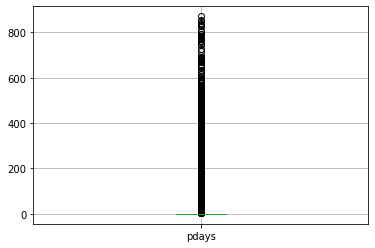

In [6]:
df.boxplot("pdays")

In [7]:
df["pdays"].median()

-1.0

In [8]:
q1,q2,q3 = np.quantile(df["pdays"], 0.25), np.quantile(df["pdays"], 0.50), np.quantile(df["pdays"], 0.75)
IQR = q3 - q1
uw,lw = q3 + (1.5 * IQR),q1 - (1.5 * IQR)
print(q1,q2,q3)
print(IQR)
print(uw,lw)

-1.0 -1.0 -1.0
0.0
-1.0 -1.0


In [9]:
df["pdays"] = np.where(df["pdays"] > uw, df["pdays"].median(), df["pdays"])
df["pdays"] = np.where(df["pdays"] < lw, df["pdays"].median(), df["pdays"])

<AxesSubplot:>

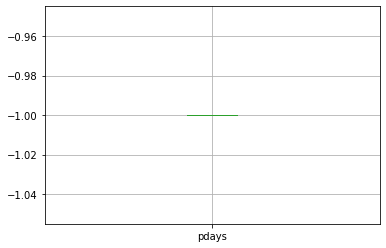

In [10]:
df.boxplot("pdays")

After removing the outliars the pdays value is -1, so after limiting the mean ahs been changed but the median will be same.

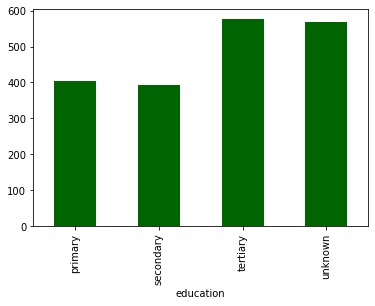

In [11]:
df.groupby(['education'])['balance'].median().plot.bar(color="darkgreen")
plt.show()

In [12]:
df.groupby(['education'])['balance'].median()

education
primary      403
secondary    392
tertiary     577
unknown      568
Name: balance, dtype: int64

First, perform bi-variate analysis to identify the features that are directly associated with the target 
variable.

<AxesSubplot:>

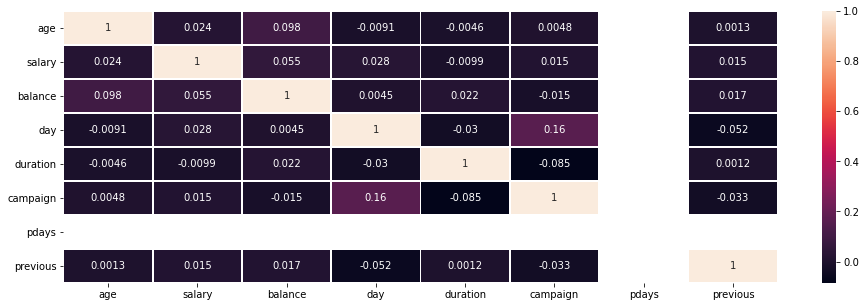

In [13]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot = True, linewidths= .8)

Convert the response variable to a convenient form

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [15]:
labelencoder = LabelEncoder()

In [16]:
df['response'] = labelencoder.fit_transform(df['response'])

In [17]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1.0,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1.0,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1.0,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1.0,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1.0,0,unknown,0


<AxesSubplot:>

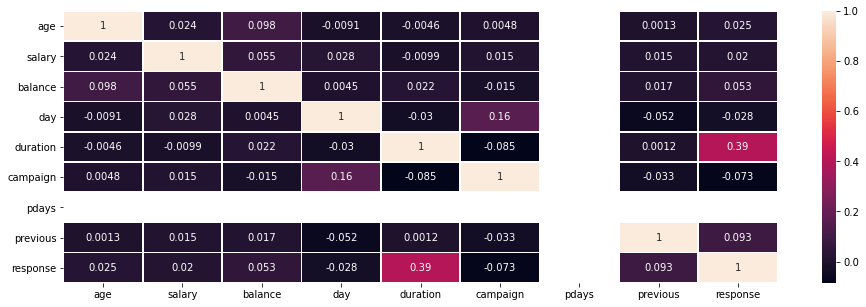

In [18]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot = True, linewidths= .8)

<AxesSubplot:>

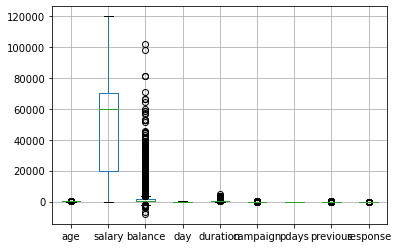

In [19]:
df.boxplot()

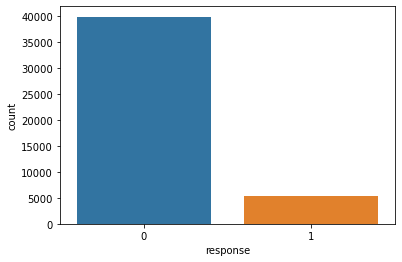

In [20]:
sns.countplot(x = "response", data = df)
plt.show()

In [21]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

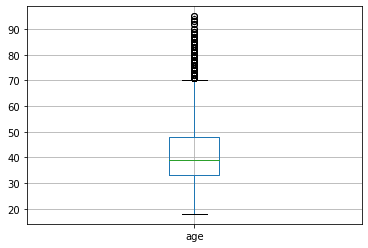

In [22]:
df.boxplot("age")
plt.show()

In [23]:
q1,q2,q3 = np.quantile(df["age"], 0.25), np.quantile(df["age"], 0.50), np.quantile(df["age"], 0.75)
IQR = q3 - q1
uw,lw = q3 + (1.5 * IQR),q1 - (1.5 * IQR)
print(q1,q2,q3)
print(IQR)
print(uw,lw)

33.0 39.0 48.0
15.0
70.5 10.5


In [24]:
df["age"] = np.where(df["age"] > uw, uw, df["age"])
df["age"] = np.where(df["age"] < lw, lw, df["age"])

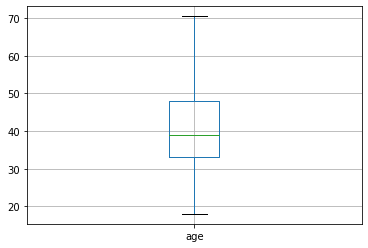

In [25]:
df.boxplot("age")
plt.show()

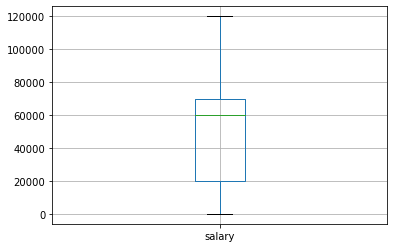

In [26]:
df.boxplot("salary")
plt.show()

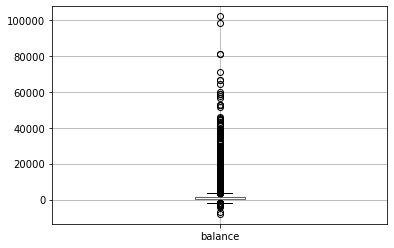

In [27]:
df.boxplot("balance")
plt.show()

In [28]:
q1,q2,q3 = np.quantile(df["balance"], 0.25), np.quantile(df["balance"], 0.50), np.quantile(df["balance"], 0.75)
IQR = q3 - q1
uw,lw = q3 + (1.5 * IQR),q1 - (1.5 * IQR)
print(q1,q2,q3)
print(IQR)
print(uw,lw)

72.0 448.0 1428.0
1356.0
3462.0 -1962.0


In [29]:
df["balance"] = np.where(df["balance"] > uw, uw, df["balance"])
df["balance"] = np.where(df["balance"] < lw, lw, df["balance"])

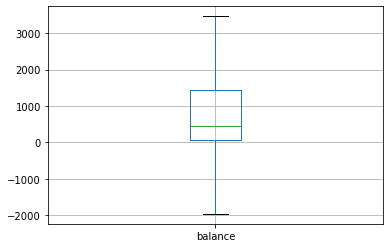

In [30]:
df.boxplot("balance")
plt.show()

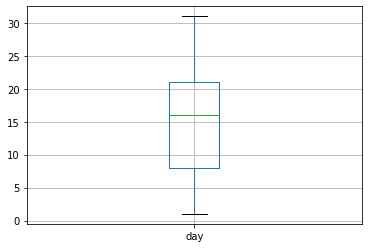

In [31]:
df.boxplot("day")
plt.show()

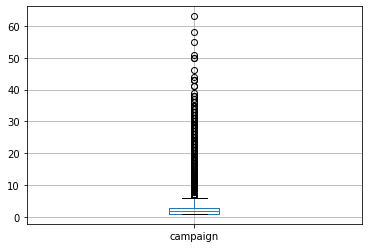

In [32]:
df.boxplot("campaign")
plt.show()

In [33]:
q1,q2,q3 = np.quantile(df["campaign"], 0.25), np.quantile(df["campaign"], 0.50), np.quantile(df["campaign"], 0.75)
IQR = q3 - q1
uw,lw = q3 + (1.5 * IQR),q1 - (1.5 * IQR)
print(q1,q2,q3)
print(IQR)
print(uw,lw)

1.0 2.0 3.0
2.0
6.0 -2.0


In [34]:
df["campaign"] = np.where(df["campaign"] > uw, uw, df["campaign"])
df["campaign"] = np.where(df["campaign"] < lw, lw, df["campaign"])

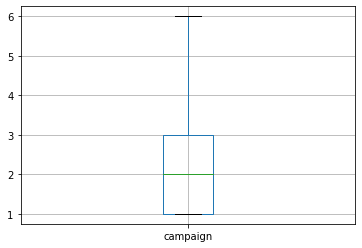

In [35]:
df.boxplot("campaign")
plt.show()

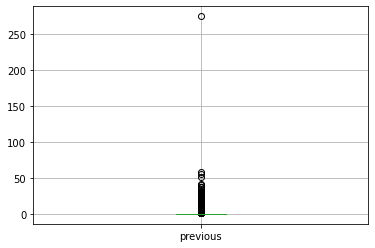

In [36]:
df.boxplot("previous")
plt.show()

In [37]:
q1,q2,q3 = np.quantile(df["previous"], 0.25), np.quantile(df["previous"], 0.50), np.quantile(df["previous"], 0.75)
IQR = q3 - q1
uw,lw = q3 + (1.5 * IQR),q1 - (1.5 * IQR)
print(q1,q2,q3)
print(IQR)
print(uw,lw)

0.0 0.0 0.0
0.0
0.0 0.0


In [38]:
df["previous"] = np.where(df["previous"] > uw, uw, df["previous"])
df["previous"] = np.where(df["previous"] < lw, lw, df["previous"])

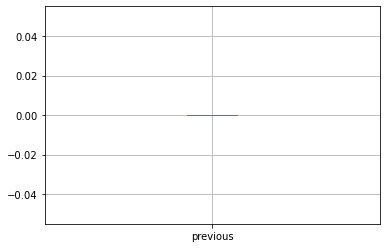

In [39]:
df.boxplot("previous")
plt.show()

Make suitable plots for associations with numerical features and categorical features’


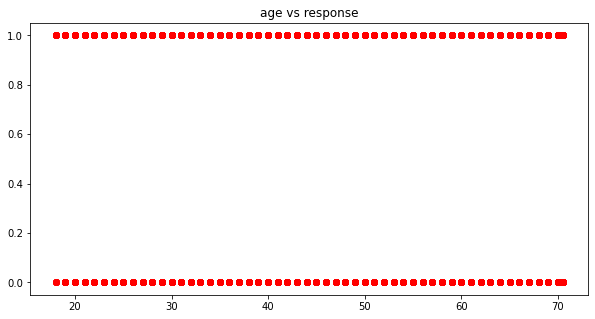

In [40]:
plt.figure(figsize = (10,5))
plt.title("age vs response")
plt.scatter(df["age"], df["response"], c = "r")
plt.show()

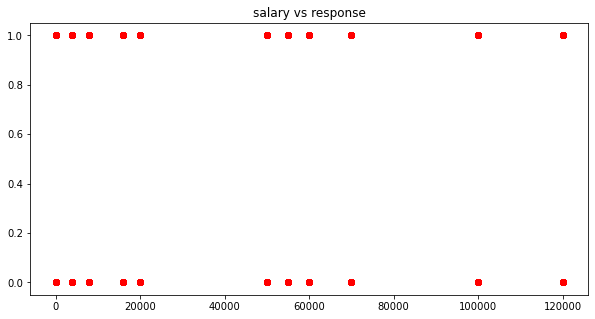

In [41]:
plt.figure(figsize = (10,5))
plt.title("salary vs response")
plt.scatter(df["salary"], df["response"], c = "r")
plt.show()

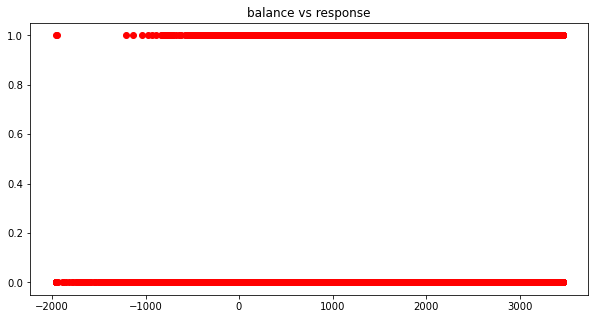

In [42]:
plt.figure(figsize = (10,5))
plt.title("balance vs response")
plt.scatter(df["balance"], df["response"], c = "r")
plt.show()

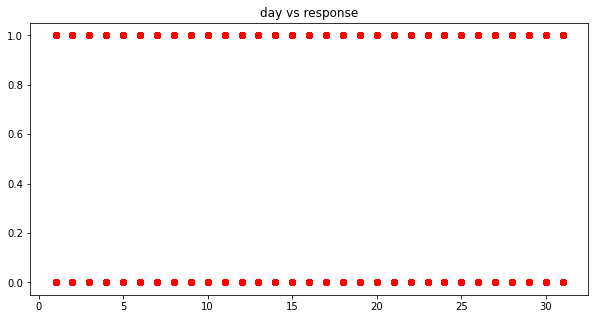

In [43]:
plt.figure(figsize = (10,5))
plt.title("day vs response")
plt.scatter(df["day"], df["response"], c = "r")
plt.show()

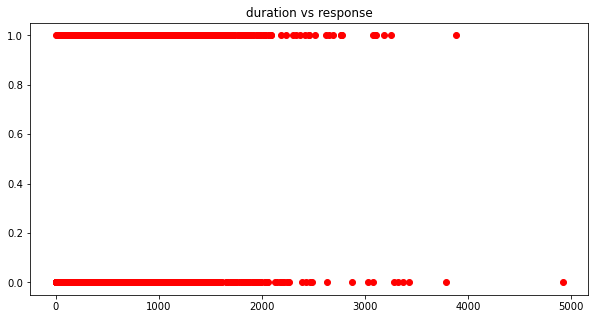

In [44]:
plt.figure(figsize = (10,5))
plt.title("duration vs response")
plt.scatter(df["duration"], df["response"], c = "r")
plt.show()

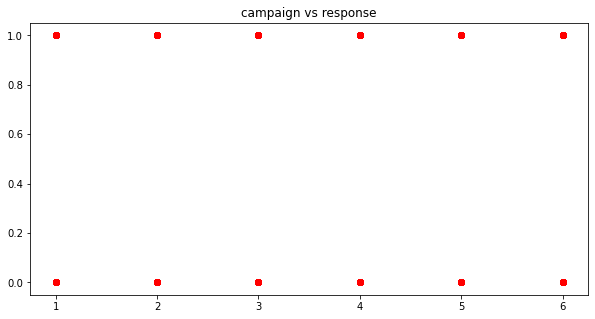

In [45]:
plt.figure(figsize = (10,5))
plt.title("campaign vs response")
plt.scatter(df["campaign"], df["response"], c = "r")
plt.show()

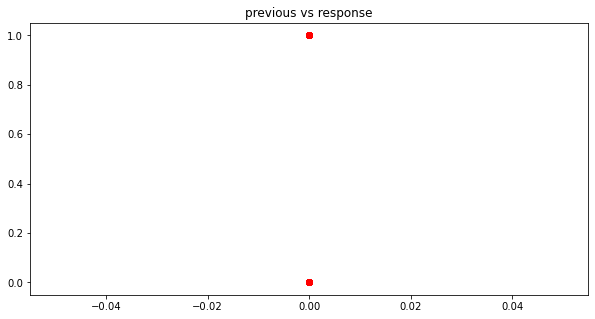

In [46]:
plt.figure(figsize = (10,5))
plt.title("previous vs response")
plt.scatter(df["previous"], df["response"], c = "r")
plt.show()

Are the features about the previous campaign data useful?


In [47]:
#no , previous features is not usefull

Are pdays and poutcome associated with the target? 

In [48]:
# NO, pdays and poutcome are also not associated with the target.

In [49]:
#pdays and p outcome has no value and its not associated with target variable its prove by the EDA so it will not be usefull to predict the response.

In [50]:
x = df[['age','salary','balance','day','duration',"campaign"]]
y = df["response"]

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### logistic regression 

In [52]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train2 = pd.DataFrame(sc_x.fit_transform(x_train))
x_test2 = pd.DataFrame(sc_x.transform(x_test))
x_train2.columns = x_train.columns.values
x_test2.columns = x_test.columns.values
x_train2.index = x_train.index.values
x_test2.index = x_test.index.values
x_train = x_train2
x_test = x_test2

In [53]:
x_train.head(5)

,age,salary,balance,day,duration,campaign
13932,1.553449,-0.223433,-0.236134,-0.698514,1.808943,-0.868259
9894,-0.370993,-1.779929,0.646502,-0.818717,-0.755580,-0.868259
39946,-0.563437,0.087866,1.599512,-1.660136,-0.604270,1.010222
9217,-0.563437,-0.223433,-0.612590,-1.299528,-0.041704,-0.868259
4124,-0.274771,0.399165,-0.520172,0.383311,-0.464598,-0.868259


In [54]:
x_test.head(5)

,age,salary,balance,day,duration,campaign
14001,-0.370993,1.333062,0.395531,-0.698514,-0.646947,2.262543
32046,-0.467215,0.399165,-1.008547,-0.217703,3.162980,-0.868259
13318,0.591228,-1.157331,-1.138272,-0.938919,-0.057223,1.636382
42991,1.553449,-1.281850,-0.369251,-0.578311,-0.592630,2.262543
14237,-0.755881,-1.157331,-1.138272,-0.217703,0.288076,-0.242099


In [55]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [56]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression (Lasso)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.887648,0.578073,0.163688,0.255132


In [57]:
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
cm = confusion_matrix(y_test,y_pred)

In [59]:
print(cm)

[[7853  127]
 [ 889  174]]


In [60]:
cr = classification_report(y_test,y_pred)

In [61]:
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.58      0.16      0.26      1063

    accuracy                           0.89      9043
   macro avg       0.74      0.57      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

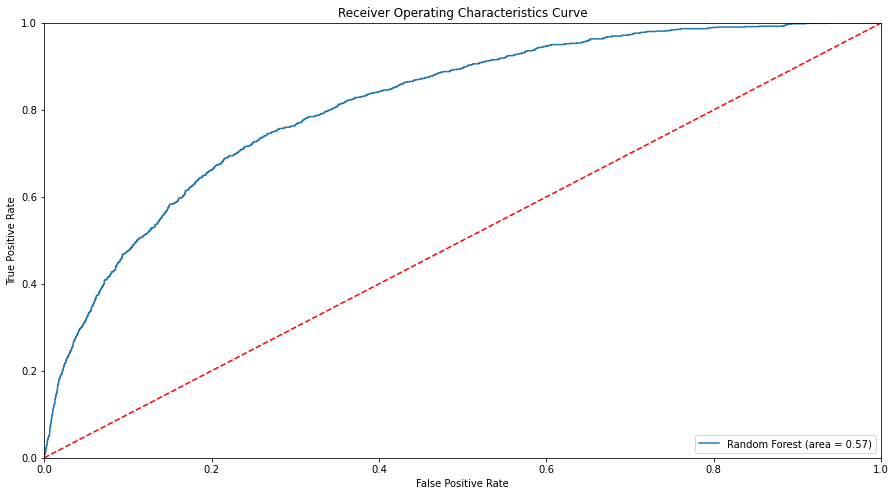

In [63]:
roc_score = roc_auc_score(y_test, classifier.predict(x_test), multi_class = "ovr")
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
plt.figure(figsize = (15, 8))
plt.plot(fpr, tpr, label = 'Random Forest (area = %0.2f)' % roc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc='lower right')
plt.show()

In [64]:
#Applying K-folds validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier, X=x_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('Logistic Regression (Lasso) Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression (Lasso) Accuracy: 0.889 (+/- 0.006)


In [65]:
#Analyzing the coefficients
pd.concat([pd.DataFrame(x_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,0.033470
1,salary,0.068510
2,balance,0.251929
3,day,-0.051974
4,duration,0.927798
5,campaign,-0.328906


In [66]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(classifier, n_features_to_select= None)
rfe = rfe.fit(x_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
x_train.columns[rfe.support_]

[False False  True False  True  True]
[4 2 1 3 1 1]


Index(['balance', 'duration', 'campaign'], dtype='object')

<ipython-input-67-ed4d753d9be2>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

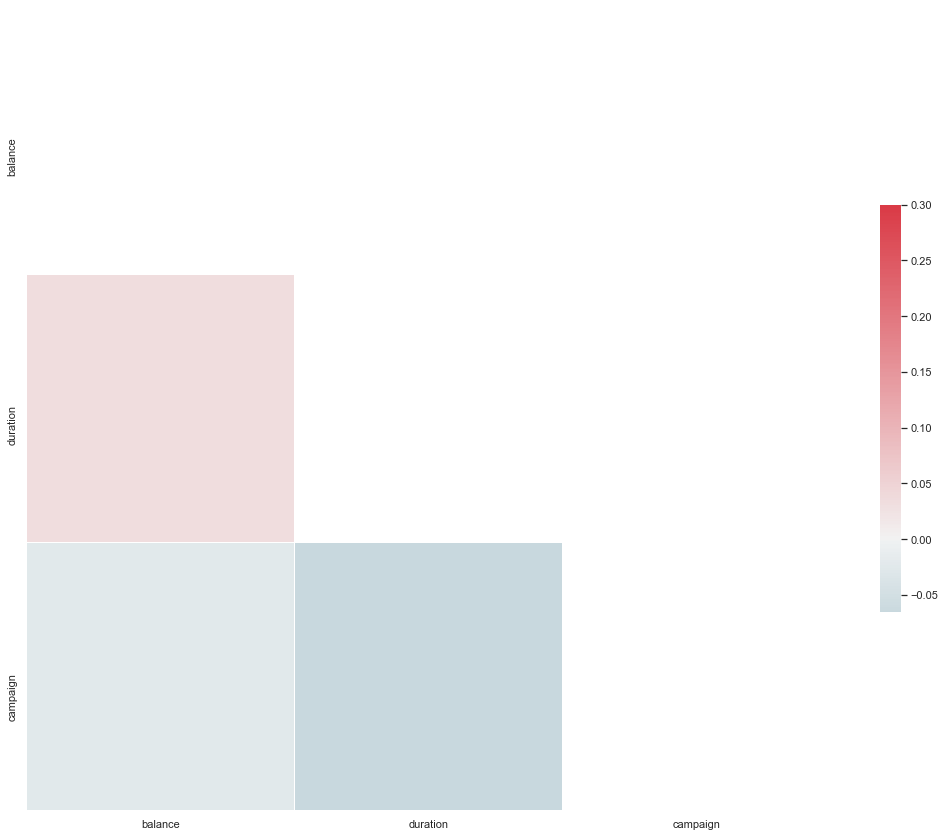

In [67]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = x_train[x_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})  

In [68]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train[x_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(x_test[x_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.887648,0.578073,0.163688,0.255132
1,Logistic Regression RFE (Lasso),0.886984,0.568106,0.160865,0.250733


In [69]:
from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()

      0         1
0   1.0  0.999789
1   1.0  0.999673
2   1.0  0.999424
3   1.0  0.998878
4   1.0  0.997701
5   0.0  0.995413
6   0.0  0.992882
7   1.0  0.989520
8   1.0  0.988200
9   0.0  0.986920
10  1.0  0.986394
11  0.0  0.986202
12  1.0  0.984797
13  0.0  0.984123
14  0.0  0.983681
15  0.0  0.980586
16  0.0  0.976778
17  0.0  0.976548
18  1.0  0.974173
19  1.0  0.970144


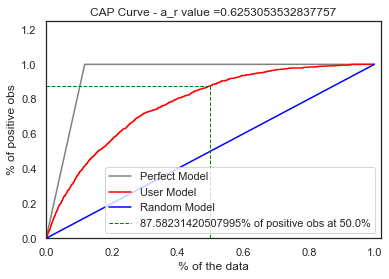

In [70]:
y_pred_prob = classifier.predict_proba(x_test[x_train.columns[rfe.support_]])
capcurve(y_test,y_pred_prob[:,1])

### RandomForest classification

In [71]:
a = [x_train, x_test, y_train, y_test]
for i in a:
    print(i.head(2))
    print("======="*5)

            age    salary   balance       day  duration  campaign
13932  1.553449 -0.223433 -0.236134 -0.698514  1.808943 -0.868259
9894  -0.370993 -1.779929  0.646502 -0.818717 -0.755580 -0.868259
            age    salary   balance       day  duration  campaign
14001 -0.370993  1.333062  0.395531 -0.698514 -0.646947  2.262543
32046 -0.467215  0.399165 -1.008547 -0.217703  3.162980 -0.868259
13932    1
9894     0
Name: response, dtype: int32
14001    0
32046    1
Name: response, dtype: int32


In [72]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50)

model = clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [73]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8866526595156474


In [74]:
print('Error Metrics')
em = metrics.classification_report(y_test, y_pred)
print(em)


Error Metrics
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7980
           1       0.54      0.25      0.35      1063

    accuracy                           0.89      9043
   macro avg       0.72      0.61      0.64      9043
weighted avg       0.86      0.89      0.87      9043



In [75]:
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[7747  233]
 [ 792  271]]


In [83]:
#Applying K-folds validation
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator= clf, X=x_train, y=y_train, cv=10)
accuracies1.mean()
accuracies1.std()
print('Random Forest Classifier Accuracy: %0.3f (+/- %0.3f)' % (accuracies1.mean(), accuracies1.std() * 2))

Random Forest Classifier Accuracy: 0.888 (+/- 0.010)


In [78]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

duration    0.373654
balance     0.188317
age         0.169382
day         0.146674
salary      0.076158
campaign    0.045815
dtype: float64

No handles with labels found to put in legend.


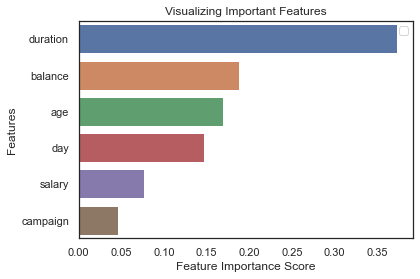

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

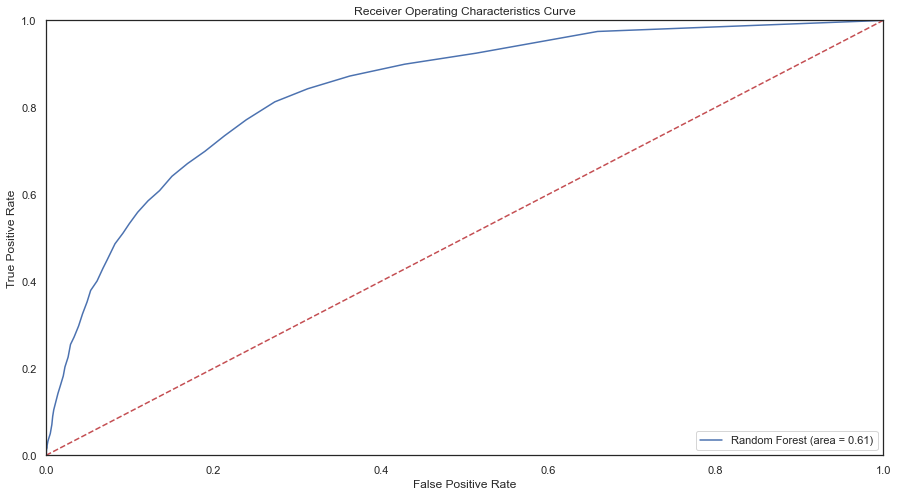

In [81]:
roc_score = roc_auc_score(y_test, model.predict(x_test), multi_class = "ovr")
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure(figsize = (15, 8))
plt.plot(fpr, tpr, label = 'Random Forest (area = %0.2f)' % roc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc='lower right')
plt.show()

### Compare the performance of the Random Forest and the logistic model 

Evaluate both models on the test set

### For Logistic regression model
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.58      0.16      0.26      1063

        accuracy                           0.89      9043
       macro avg       0.74      0.57      0.60      9043
     weighted avg       0.86      0.89      0.86      9043


### for Random forest regressor
    Error Metrics
                precision    recall  f1-score   support

           0       0.91      0.97      0.94      7980
           1       0.52      0.25      0.34      1063

        accuracy                           0.88      9043
       macro avg       0.71      0.61      0.64      9043
     weighted avg       0.86      0.88      0.87      9043


Here Both the model has same accuracy  , so we can accept any model for prediction.

### Which metric did you choose and why?

### Which model has better performance on the test set? 

Both model has same performance and accuracy.

### Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

#### For Logistic regression model

	features	      coef
    age	        0.033470
    salary	     0.068510
    balance	    0.251929
    day	       -0.051974
    duration       0.927798
    campaign      -0.328906

Here Duration is the very important feature for model prediction

#### For Random forest regressor

    duration    0.375466
    balance     0.188377
    age         0.167738
    day         0.146197
    salary      0.076843
    campaign    0.045378

Here also from all the coloumns duraction is the very important column.

Yes, top feature is similar in both the model which is duration.